#https://www.youtube.com/watch?v=wQ8BIBpya2k

In [0]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test,y_test) = mnist.load_data()


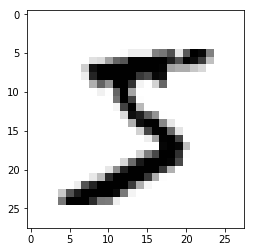

In [40]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:

#normalizing the data for simplify the process
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

#Building the model
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#define the parameter training
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#training
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 132us/sample - loss: 0.2587 - acc: 0.9243
Epoch 2/3
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1022 - acc: 0.9690
Epoch 3/3
60000/60000 [==============================] - 7s 121us/sample - loss: 0.0709 - acc: 0.9778


In [0]:
#validation the model
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.0901 - acc: 0.9727
0.0901395332409069 0.9727


In [0]:
#save the model
model.save('epic_num_reader.model')

In [35]:
#reload the model
new_model=tf.keras.models.load_model('epic_num_reader.model')

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
predictions=new_model.predict(x_test)

In [38]:
print(predictions)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
import numpy as np
print(np.argmax(predictions[0]))

7


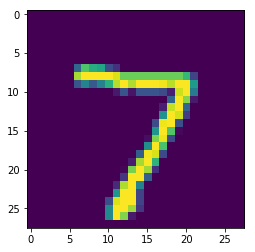

In [41]:
plt.imshow(x_test[0])
plt.show()